<a href="https://colab.research.google.com/github/devmehar/DL-Projects/blob/main/Project_1_Distracted_Driver_MultiAction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tensorflow==2.17.1
#!pip install tensorflow-gpu==2.8.0rc0;?

In [2]:
# import tensorflow as tf
# print(tf.__version__)

In [3]:
# !wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

In [4]:
# !unzip '/content/state-farm-distracted-driver-detection.zip'

In [5]:
# !unzip '/content/imgs.zip'

In [6]:
import numpy as np
import pandas as pd
import random

import os
print(os.listdir("/content/Inputs"))

['train', 'sample_submission.csv', 'driver_imgs_list.csv', 'test']


In [7]:
len(os.listdir('/content/Inputs/test'))

79726

In [8]:
print(len(os.listdir('/content/Inputs/train/c0')))
print(len(os.listdir('/content/Inputs/train/c1')))
print(len(os.listdir('/content/Inputs/train/c2')))
print(len(os.listdir('/content/Inputs/train/c3')))
print(len(os.listdir('/content/Inputs/train/c4')))
print(len(os.listdir('/content/Inputs/train/c5')))
print(len(os.listdir('/content/Inputs/train/c6')))
print(len(os.listdir('/content/Inputs/train/c7')))
print(len(os.listdir('/content/Inputs/train/c8')))
print(len(os.listdir('/content/Inputs/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


In [9]:
directory = '/content/Inputs/train'
test_directory = '/content/Inputs/test/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [10]:
img_size = 200

In [11]:
import cv2
import matplotlib.pyplot as plt

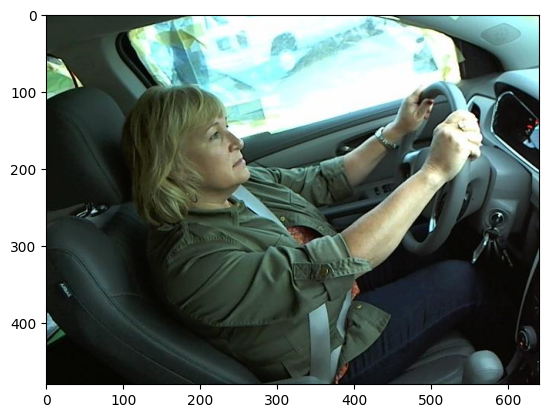

In [12]:
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

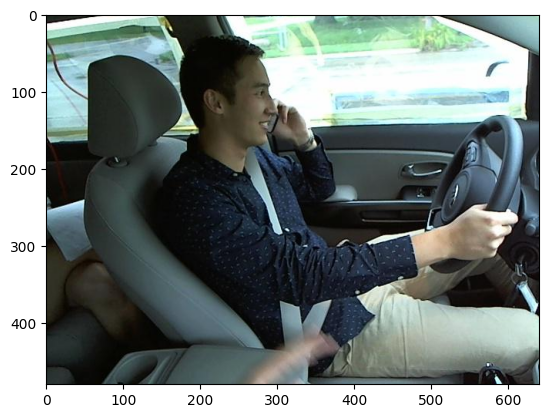

In [13]:
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [14]:
print(img_array.shape)

(480, 640, 3)


(200, 200, 3)


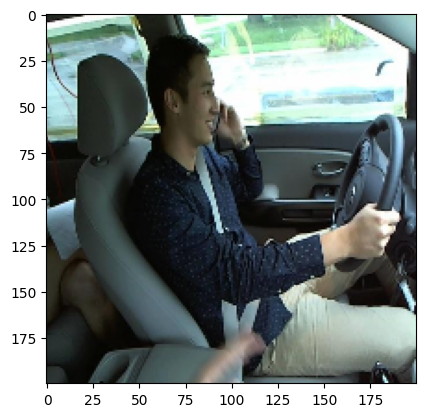

In [15]:
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [16]:
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size,img_size))
            training_data.append([new_img,class_num])

In [17]:
create_training_data()

In [18]:
print(len(training_data))

22424


In [19]:
random.shuffle(training_data)
x = []
y = []

In [20]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [21]:
len(x),len(y)

(22424, 22424)

In [22]:
x[0].shape

(200, 200, 3)

In [23]:
len(x)

22424

In [24]:
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(200, 200, 3)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
del x,y

In [27]:
import gc
gc.collect()

0

In [28]:
from tensorflow.keras import utils

In [29]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)

In [30]:
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [31]:
# First Model:
model = models.Sequential()
#1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
#2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
#3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
#4
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
#Dense and O/P
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

# # Second model for faster execution:
# model = models.Sequential()
# model.add(SeparableConv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(SeparableConv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.4))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# # Third model using ResNet to improve accuracy:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# # Load ResNet50 with modified input shape
# base_model = ResNet50(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(200, 200, 3)  # Adjusted to match your data
# )

# base_model.trainable = False  # Freeze ResNet layers (optional)

# # Model with lesser complexity to reduce computation
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(120, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.4),
#     Dense(10, activation='softmax')
# ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 198, 198, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 198, 198, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 198, 198, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 99, 99, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 99, 99, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 99, 99, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 99, 99, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,396,778 (89.25 MB)

 Trainable params: 23,393,834 (89.24 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# callback = [callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
#             ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)]

# 1. Save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Filepath to save the model
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode for metric (max for accuracy, min for loss)
    verbose=1
)

# 2. Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,  # Number of epochs with no improvement before stopping
    mode='min',  # Mode for metric (min for loss)
    verbose=1
)

# 3. Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.1,  # Factor by which to reduce the learning rate
    patience=5,  # Number of epochs with no improvement before reducing
    min_lr=1e-6,  # Minimum learning rate
    verbose=1
)

# Combine all callbacks
callback = [model_checkpoint, early_stopping, reduce_lr]

batch_size = 70
n_epochs = 15

In [34]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.4370 - loss: 1.7885
Epoch 1: val_accuracy improved from -inf to 0.93356, saving model to best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 156s 525ms/step - accuracy: 0.4379 - loss: 1.7854 - val_accuracy: 0.9336 - val_loss: 0.2122 - learning_rate: 0.0010
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9079 - loss: 0.2910
Epoch 2: val_accuracy improved from 0.93356 to 0.93490, saving model to best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 109s 485ms/step - accuracy: 0.9080 - loss: 0.2908 - val_accuracy: 0.9349 - val_loss: 0.2056 - learning_rate: 0.0010
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9451 - loss: 0.1730
Epoch 3: val_accuracy improved from 0.93490 to 0.98202, saving model to best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 141s 483ms/step - accuracy: 0.9452 - loss: 0.1730 - val_accuracy: 0.9820 - val_loss: 0.0606 - learning_rate: 0.0010
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━

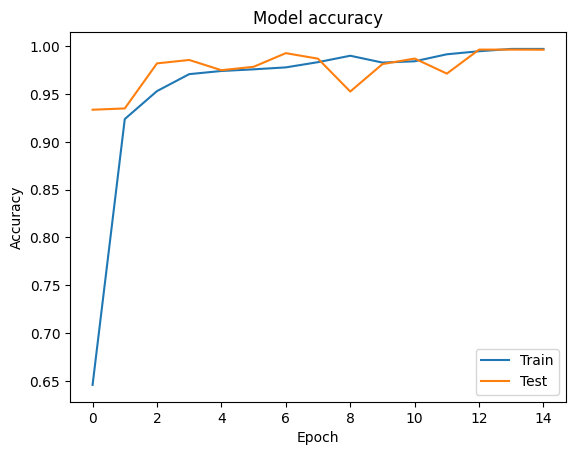

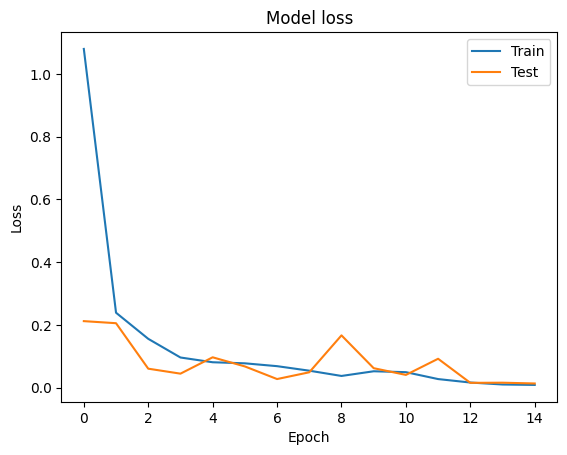

In [35]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [36]:
# pred= model.predict_classes(x_test)
pred_probs = model.predict(x_test)

# Use np.argmax to get the class with the highest probability
pred = np.argmax(pred_probs, axis=-1)

211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step


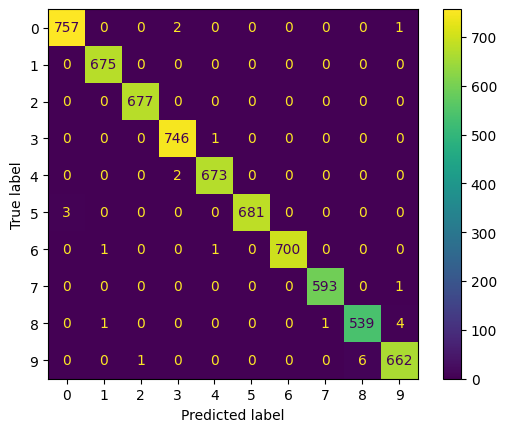

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and pred are defined
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', values_format='d')
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       675
           2       1.00      1.00      1.00       677
           3       0.99      1.00      1.00       747
           4       1.00      1.00      1.00       675
           5       1.00      1.00      1.00       684
           6       1.00      1.00      1.00       702
           7       1.00      1.00      1.00       594
           8       0.99      0.99      0.99       545
           9       0.99      0.99      0.99       669

    accuracy                           1.00      6728
   macro avg       1.00      1.00      1.00      6728
weighted avg       1.00      1.00      1.00      6728



In [39]:
# Classes Definitions
# c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger

Random File Selected: /content/Inputs/test/img_46226.jpg
Image Preprocessed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: [[0.000000e+00 0.000000e+00 2.456538e-17 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]]
Predicted Class: 9


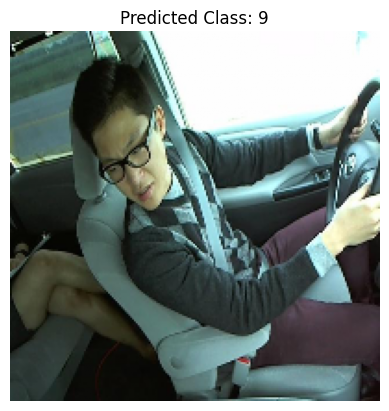

In [58]:
random_filename = random.choice([
    x for x in os.listdir(test_directory)
    if os.path.isfile(os.path.join(test_directory, x))
])
random_filename = os.path.join(test_directory, random_filename)
print('Random File Selected:', random_filename)

img_array = cv2.imread(random_filename, cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(RGB_img, (img_size, img_size))
new_img = new_img / 255.0  # Normalize if required by your model
print('Image Preprocessed.')

prediction = model.predict(new_img.reshape(-1, img_size, img_size, 3))
print('Prediction:', prediction)

predicted_class = np.argmax(prediction)
print('Predicted Class:', predicted_class)

plt.imshow(new_img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

In [ ]:
model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

In [ ]:
model.save('./driverdistraction.h5')